# 95-869: Big Data and Large-Scale Computing Homework 2


## **Linear Regression Assignment**
#### This assignment covers a common supervised learning pipeline, using a modified version of the [Million Song Dataset](http://labrosa.ee.columbia.edu/millionsong/) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD). Our goal is to train a linear regression model to predict the release year of a song given a set of audio features.
#### **This assignment will cover:**
*  *Part 1 (15 Points):* Read and parse the initial dataset

*  *Part 2 (15 Points):* Create and evaluate a baseline model

*  *Part 3 (15 Points):* Train least squares linear regression (via gradient descent) and evaluate a linear regression model

*  *Part 4 (15 Points):* Train least squares linear regression with L1 and L2 regularization (via gradient descent) and evaluate a linear regression model

*  *Part 5 (15 Points):* Train using SparkML and tune hyperparameters via grid search

*  *Part 6 (25 Points):* Distributed Learning with Minibatching and Divide-and-Conquer

#### Note that, for reference, you can look up the details of the relevant Spark methods in [Spark's Python API](https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD) and the relevant NumPy methods in the [NumPy Reference](http://docs.scipy.org/doc/numpy/reference/index.html)

## Submission Instructions:

You will submit both a PDF and an IPython file on Canvas. No printout submission is expected.

Rename the notebook from "hw2_linear_reg_student.ipynb" to "andrewid_hw2_linear_reg_student.ipynb" where "andrewid" is your actual Andrew ID. Complete the assignment, execute all cells in the completed notebook, and make sure all results show up. Export the contents of the notebook by choosing "File > Download as > HTML" and saving the resulting file as "andrewid_hw2_linear_reg_student.html" Convert the exported HTML file to PDF by using a feature such as the "Save as PDF" feature on Mac. Submit the IPython and exported PDF solution files on Canvas.

### **Part 1: Read and parse the initial dataset**

#### **(1a) Load and check the data**
#### The raw data is currently stored in text file.  We will start by storing this raw data in as an RDD, with each element of the RDD representing a data point as a comma-delimited string. Each string starts with the label (a year) followed by numerical audio features. Use the [count method](https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.count) to check how many data points we have.  Then use the [take method](https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.take) to create and print out a list of the first 5 data points in their initial string format.

In [1]:
import os
import sys
import os.path
import warnings
warnings.filterwarnings('ignore')

sys.path.append("/opt/packages/spark/latest/python/lib/py4j-0.10.9-src.zip")
sys.path.append("/opt/packages/spark/latest/python/")
sys.path.append("/opt/packages/spark/latest/python/pyspark")
from pyspark import SparkConf, SparkContext
sc = SparkContext()
sc

23/11/16 19:32:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


<SparkContext master=local[*] appName=pyspark-shell>

In [2]:
numPartitions = 10
rawData = sc.textFile('file:///ocean/projects/cis220071p/shared/data/millionsong_bigdata.txt', numPartitions)

In [3]:
# TODO: Replace <FILL IN> with appropriate code
numPoints = rawData.count()
print (numPoints)
samplePoints = rawData.take(5)
print (samplePoints)

1015324
['2.00500000e+03,8.00890230e-01,6.56657992e-01,3.25012011e-01,3.88967777e-01,2.59227069e-01,3.51218956e-01,3.55794257e-01,3.50315260e-01,6.40341845e-01,5.62001594e-01,5.95646033e-01,4.98571737e-01', '1.97400000e+03,6.13489242e-01,6.41458028e-01,2.78497062e-01,3.36810765e-01,3.80977949e-01,3.37200764e-01,3.53774994e-01,4.24861111e-01,5.51306540e-01,4.45964685e-01,6.22590106e-01,6.09032474e-01', '1.98700000e+03,8.43599476e-01,6.17139860e-01,5.02508467e-01,4.38770294e-01,3.11464360e-01,3.81006120e-01,4.58850780e-01,4.43217844e-01,6.05648100e-01,4.45977090e-01,5.14609707e-01,4.28761963e-01', '2.00800000e+03,8.77323637e-01,6.72525879e-01,4.71228100e-01,4.33595141e-01,2.79012358e-01,3.51656386e-01,4.67118237e-01,4.72284730e-01,6.34704607e-01,6.01637231e-01,4.91206094e-01,4.04435583e-01', '1.97000000e+03,6.52183301e-01,6.55613002e-01,5.04868026e-01,5.10029804e-01,3.70969860e-01,6.92052424e-01,4.04965750e-01,2.42278423e-01,5.86823050e-01,2.77983946e-01,5.36907965e-01,6.03661483e-01']


#### **(1b) Using `LabeledPoint`**
#### In MLlib, labeled training instances are stored using the [LabeledPoint](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.mllib.regression.LabeledPoint.html) object.  Write the parsePoint function that takes as input a raw data point, parses it using Python's [unicode.split](https://docs.python.org/2/library/string.html#string.split) method, and returns a `LabeledPoint`.  Use this function to parse samplePoints (from the previous question).  Then print out the features and label for the first training point, using the `LabeledPoint.features` and `LabeledPoint.label` attributes. Finally, calculate the number features for this dataset.
#### Note that `split()` can be called directly on a `unicode` or `str` object.  For example, `u'split,me'.split(',')` returns `[u'split', u'me']`.

In [4]:
import numpy as np
from pyspark.mllib.regression import LabeledPoint


# Here is a sample raw data point:
# '2001.0,0.884,0.610,0.600,0.474,0.247,0.357,0.344,0.33,0.600,0.425,0.60,0.419'
# In this raw data point, 2001.0 is the label, and the remaining values are features

In [5]:
# TODO: Replace <FILL IN> with appropriate code
def parsePoint(line):
    """Converts a comma separated unicode string into a `LabeledPoint`.

    Args:
        line (unicode): Comma separated unicode string where the first element is the label and the
            remaining elements are features.

    Returns:
        LabeledPoint: The line is converted into a `LabeledPoint`, which consists of a label and
            features.
    """
    nums = [float(x) for x in line.split(',')]
    return LabeledPoint(nums[0],nums[1:])

parsedSamplePoints = [parsePoint(line) for line in rawData.take(5)]
firstPointFeatures = parsedSamplePoints[0].features
firstPointLabel = parsedSamplePoints[0].label
print (firstPointFeatures, firstPointLabel)

d = len(firstPointFeatures)
print (d)

[0.80089023,0.656657992,0.325012011,0.388967777,0.259227069,0.351218956,0.355794257,0.35031526,0.640341845,0.562001594,0.595646033,0.498571737] 2005.0
12


#### **Visualization 1: Features**
#### First we will load and setup the visualization library.  Then we will look at the raw features for 100 data points by generating a heatmap that visualizes each feature on a grey-scale and shows the variation of each feature across the 100 sample data points.  The features are all between 0 and 1, with values closer to 1 represented via darker shades of grey.

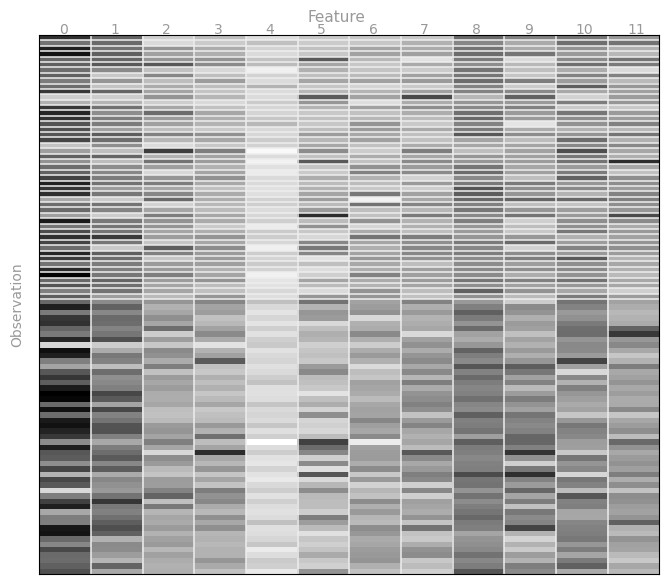

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

sampleMorePoints = rawData.take(100)
# You can uncomment the line below to see randomly selected features.  These will be randomly
# selected each time you run the cell.  Note that you should run this cell with the line commented
# out when answering the lab quiz questions.
# sampleMorePoints = rawData.takeSample(False, 100)

parsedSampleMorePoints = map(parsePoint, sampleMorePoints)
dataValues = list(map(lambda lp: lp.features.toArray(), parsedSampleMorePoints))

def preparePlot(xticks, yticks, figsize=(10.5, 6), hideLabels=False, gridColor='#999999',
                gridWidth=1.0):
    """Template for generating the plot layout."""
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hideLabels: axis.set_ticklabels([])
    plt.grid(color=gridColor, linewidth=gridWidth, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

# generate layout and plot
fig, ax = preparePlot(np.arange(.5, 11, 1), np.arange(.5, 49, 1), figsize=(8,7), hideLabels=True,
                     gridColor='#eeeeee', gridWidth=1.1)
image = plt.imshow(dataValues, interpolation='nearest', aspect='auto', cmap=cm.Greys)
for x, y, s in zip(np.arange(-.125, 12, 1), np.repeat(-.75, 12), [str(x) for x in range(12)]):
    plt.text(x, y, s, color='#999999', size='10')
plt.text(4.7, -3, 'Feature', color='#999999', size='11'), ax.set_ylabel('Observation')
plt.show()

#### **(1c) Find the range**
#### Now let's examine the labels to find the range of song years.  To do this, first parse each element of the `rawData` RDD, and then find the smallest and largest labels.

In [7]:
# TODO: Replace <FILL IN> with appropriate code
parsedDataInit = rawData.map(lambda x:parsePoint(x))
labels = parsedDataInit.map(lambda pt: pt.label).collect()
minYear = min(labels)
maxYear = max(labels)
print (maxYear, minYear)

2011.0 1922.0


#### **(1d) Shift labels**
#### As we just saw, the labels are years in the 1900s and 2000s.  In learning problems, it is often natural to shift labels such that they start from zero.  Starting with `parsedDataInit`, create a new RDD consisting of `LabeledPoint` objects in which the labels are shifted such that smallest label equals zero.

In [8]:
# TODO: Replace <FILL IN> with appropriate code

def shift_label(pt):
    pt.label = pt.label - 1922.0
    return pt

# parsedData = parsedDataInit.map(lambda pt: shift_label(pt))
parsedData = parsedDataInit.map(lambda pt: LabeledPoint(pt.label - 1922.0,pt.features))

# Should be a LabeledPoint
print (type(parsedData.take(1)[0]))
# View the first point
print ('\n{0}'.format(parsedData.take(1)))

<class 'pyspark.mllib.regression.LabeledPoint'>

[LabeledPoint(83.0, [0.80089023,0.656657992,0.325012011,0.388967777,0.259227069,0.351218956,0.355794257,0.35031526,0.640341845,0.562001594,0.595646033,0.498571737])]


#### **Visualization 2: Shifting labels**
#### We will look at the labels before and after shifting them.  Both scatter plots below visualize tuples storing i) a label value and ii) the number of training points with this label.  The first scatter plot uses the initial labels, while the second one uses the shifted labels.  Note that the two plots look the same except for the labels on the x-axis.

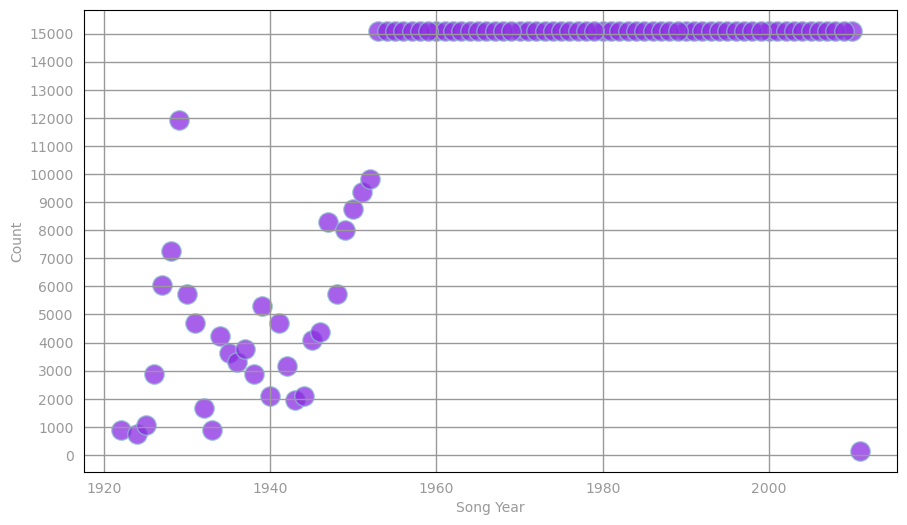

In [9]:
# get data for plot
oldData = (parsedDataInit
           .map(lambda lp: (lp.label, 1))
           .reduceByKey(lambda x, y: x + y)
           .collect())
x, y = zip(*oldData)

# generate layout and plot data
fig, ax = preparePlot(np.arange(1920, 2050, 20), np.arange(0, 25000, 1000))
plt.scatter(x, y, s=14**2, c='#8A2BE2', edgecolors='#8cbfd0', alpha=0.75)
ax.set_xlabel('Song Year'), ax.set_ylabel('Count')
plt.show()

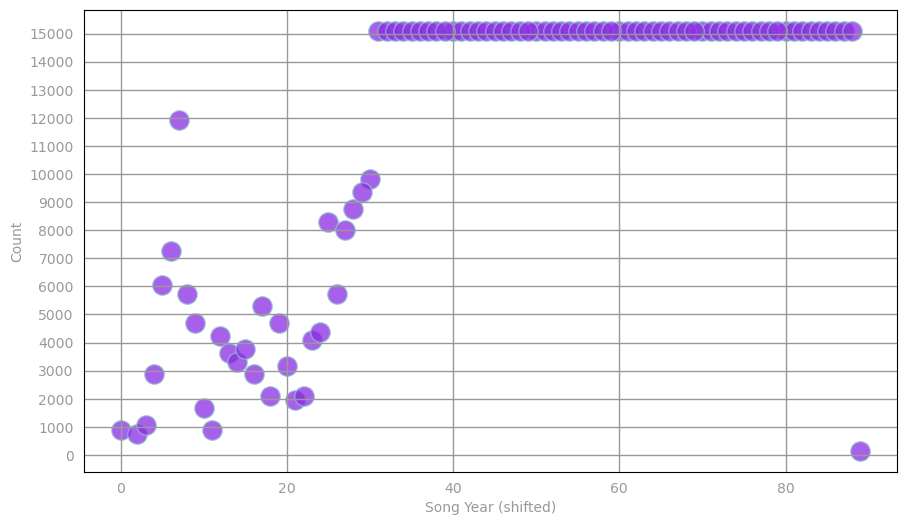

In [10]:
# get data for plot
newData = (parsedData
           .map(lambda lp: (lp.label, 1))
           .reduceByKey(lambda x, y: x + y)
           .collect())
x, y = zip(*newData)

# generate layout and plot data
fig, ax = preparePlot(np.arange(0, 120, 20), np.arange(0, 25000, 1000))
plt.scatter(x, y, s=14**2, c='#8A2BE2', edgecolors='#8cbfd0', alpha=0.75)
ax.set_xlabel('Song Year (shifted)'), ax.set_ylabel('Count')
plt.show()

#### **(1e) Training, validation, and test sets**
#### We're almost done parsing our dataset, and our final task involves split it into training, validation and test sets. Use the [randomSplit method](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.RDD.randomSplit.html) with the specified weights and seed to create RDDs storing each of these datasets. Next, cache each of these RDDs, as we will be accessing them multiple times in the remainder of this lab. Finally, compute the size of each dataset and verify that the sum of their sizes equals the value computed in Part (1a).

In [11]:
# TODO: Replace <FILL IN> with appropriate code
weights = [.8, .1, .1]
seed = 0
parsedTrainData, parsedValData, parsedTestData = parsedData.randomSplit(weights,seed)
parsedTrainData.cache()
parsedValData.cache()
parsedTestData.cache()
nTrain = parsedTrainData.count()
nVal = parsedValData.count()
nTest = parsedTestData.count()

print (nTrain, nVal, nTest, nTrain + nVal + nTest)
print (parsedData.count())

812696 101414 101214 1015324
1015324


### **Part 2: Create and evaluate a baseline model**

#### **(2a) Average label**
#### A very simple yet natural baseline model is one where we always make the same prediction independent of the given data point, using the average label in the training set as the constant prediction value.  Compute this value, which is the average (shifted) song year for the training set.  Use an appropriate method in the [RDD API](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.RDD.html).

In [12]:
# TODO: Replace <FILL IN> with appropriate code
averageTrainYear = (parsedTrainData
                    .map(lambda pt: pt.label)
                   .mean())
print (averageTrainYear)

53.79005064624418


#### **(2b) Root mean squared error**
#### We naturally would like to see how well this naive baseline performs.  We will use root mean squared error ([RMSE](http://en.wikipedia.org/wiki/Root-mean-square_deviation)) for evaluation purposes.  Implement a function to compute RMSE given an RDD of (label, prediction) tuples, and test out this function on an example.

In [13]:
# TODO: Replace <FILL IN> with appropriate code
def squaredError(label, prediction):
    """Calculates the the squared error for a single prediction.

    Args:
        label (float): The correct value for this observation.
        prediction (float): The predicted value for this observation.

    Returns:
        float: The difference between the `label` and `prediction` squared.
    """
    return (label - prediction)**2

def calcRMSE(labelsAndPreds):
    """Calculates the root mean squared error for an `RDD` of (label, prediction) tuples.

    Args:
        labelsAndPred (RDD of (float, float)): An `RDD` consisting of (label, prediction) tuples.

    Returns:
        float: The square root of the mean of the squared errors.
    """
    temp_sum = sum([squaredError(label,prediction) for label,prediction in labelsAndPreds.collect()])
    return (temp_sum/labelsAndPreds.count())**0.5

labelsAndPreds = sc.parallelize([(3., 1.), (1., 2.), (2., 2.)])
# RMSE = sqrt[((3-1)^2 + (1-2)^2 + (2-2)^2) / 3] = 1.291
exampleRMSE = calcRMSE(labelsAndPreds)
print (exampleRMSE)

1.2909944487358056


#### **(2c) Training, validation and test RMSE**
#### Now let's calculate the training, validation and test RMSE of our baseline model. To do this, first create RDDs of (label, prediction) tuples for each dataset, and then call calcRMSE. Note that each RMSE can be interpreted as the average prediction error for the given dataset (in terms of number of years).

In [14]:
# TODO: Replace <FILL IN> with appropriate code
labelsAndPredsTrain = parsedTrainData.map(lambda x: (x.label,averageTrainYear))
rmseTrainBase = calcRMSE(labelsAndPredsTrain)

labelsAndPredsVal = parsedValData.map(lambda x: (x.label,averageTrainYear))
rmseValBase = calcRMSE(labelsAndPredsVal)

labelsAndPredsTest = parsedTestData.map(lambda x: (x.label,averageTrainYear))
rmseTestBase = calcRMSE(labelsAndPredsTest)

print ('Baseline Train RMSE = {0:.3f}'.format(rmseTrainBase))
print ('Baseline Validation RMSE = {0:.3f}'.format(rmseValBase))
print ('Baseline Test RMSE = {0:.3f}'.format(rmseTestBase))

Baseline Train RMSE = 21.416
Baseline Validation RMSE = 21.448
Baseline Test RMSE = 21.407


#### **Visualization 3: Predicted vs. actual**
#### We will visualize predictions on the validation dataset. The scatter plots below visualize tuples storing i) the predicted value and ii) true label.  The first scatter plot represents the ideal situation where the predicted value exactly equals the true label, while the second plot uses the baseline predictor (i.e., `averageTrainYear`) for all predicted values.  Further note that the points in the scatter plots are color-coded, ranging from light red when the true and predicted values are equal to dark purple when they drastically differ.

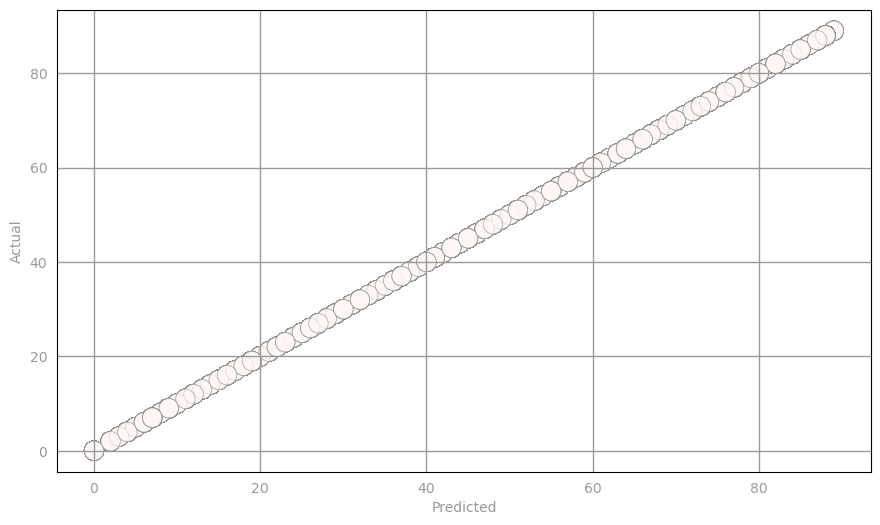

In [15]:
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.cm import get_cmap
cmap = get_cmap('RdPu')
norm = Normalize()

actual = np.asarray(parsedValData
                    .map(lambda lp: lp.label)
                    .collect())
error = np.asarray(parsedValData
                   .map(lambda lp: squaredError(lp.label, lp.label))
                   .collect())
clrs = cmap(np.asarray(norm(error)))[:,0:3]

fig, ax = preparePlot(np.arange(0, 100, 20), np.arange(0, 100, 20))
plt.scatter(actual, actual, s=14**2, c=clrs, edgecolors='#888888', alpha=0.75, linewidths=0.5)
ax.set_xlabel('Predicted'), ax.set_ylabel('Actual')
plt.show()

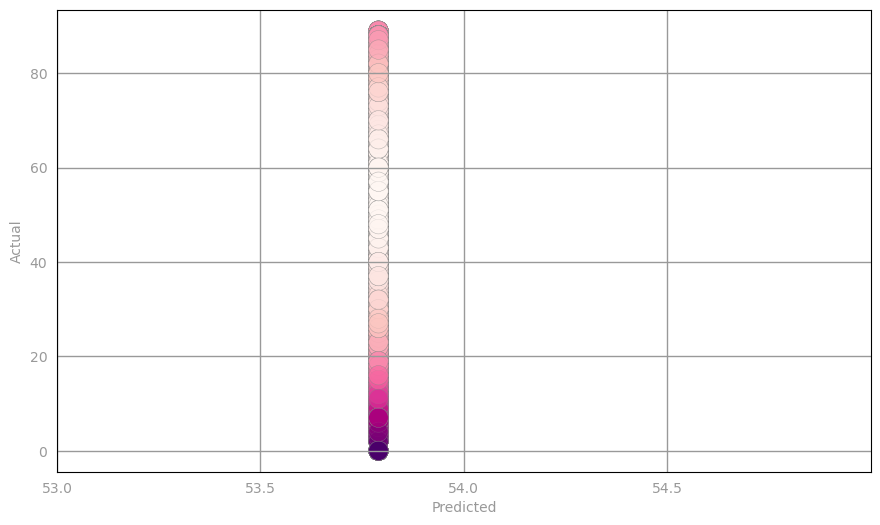

In [16]:
predictions = np.asarray(parsedValData
                         .map(lambda lp: averageTrainYear)
                         .collect())
error = np.asarray(parsedValData
                   .map(lambda lp: squaredError(lp.label, averageTrainYear))
                   .collect())
norm = Normalize()
clrs = cmap(np.asarray(norm(error)))[:,0:3]

fig, ax = preparePlot(np.arange(53.0, 55.0, 0.5), np.arange(0, 100, 20))
ax.set_xlim(53, 55)
plt.scatter(predictions, actual, s=14**2, c=clrs, edgecolors='#888888', alpha=0.75, linewidths=0.3)
ax.set_xlabel('Predicted'), ax.set_ylabel('Actual')
plt.show()

### **Part 3: Train Least Squares Linear Regression (via gradient descent) and evaluate a linear regression model**

#### **(3a) Gradient summand**
#### Now let's see if we can do better via linear regression, training a model via gradient descent (we'll omit the intercept for now). Recall that the gradient descent update for linear regression is: $$ \scriptsize \mathbf{w}_{i+1} = \mathbf{w}_i - \alpha_i \sum_j (\mathbf{w}_i^\top\mathbf{x}_j  - y_j) \mathbf{x}_j \,.$$ where i is the iteration number of the gradient descent algorithm, and  j identifies the observation.
#### First, implement a function that computes the summand for this update, i.e., the summand equals $$ (\mathbf{w}^\top \mathbf{x} - y) \mathbf{x} \, ,$$ and test out this function on two examples.  Use the `DenseVector` [dot](http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#pyspark.mllib.linalg.DenseVector.dot) method.

In [17]:
from pyspark.mllib.linalg import DenseVector

In [18]:
# TODO: Replace <FILL IN> with appropriate code
def gradientSummand(weights, lp):
    """Calculates the gradient summand for a given weight and `LabeledPoint`.

    Note:
        `DenseVector` behaves similarly to a `numpy.ndarray` and they can be used interchangably
        within this function.  For example, they both implement the `dot` method.

    Args:
        weights (DenseVector): An array of model weights (betas).
        lp (LabeledPoint): The `LabeledPoint` for a single observation.

    Returns:
        DenseVector: An array of values the same length as `weights`.  The gradient summand.
    """
    return DenseVector((weights.dot(lp.features) - lp.label)*lp.features)
    

exampleW = DenseVector([1, 2, 1])
exampleLP = LabeledPoint(3.0, [3, 2, 4])
# gradientSummand = (dot([1 2 1], [3 2 4]) - 3) * [3 2 4] = (11 - 3) * [3 2 4] = [24 16 32]
summandOne = gradientSummand(exampleW, exampleLP)
print (summandOne)

exampleW = DenseVector([.25, 1.2, -1.4])
exampleLP = LabeledPoint(3.0, [-1.4, 4.2, 2.1])
# gradientSummand = (dot([.25 1.2 -1.4], [-1.4 4.2 2.1]) - 3) * [-1.4 4.2 2.1] = −1.25. * [-1.4 4.2 2.1] = [1.75,−5.25,−2.625]
summandTwo = gradientSummand(exampleW, exampleLP)
print (summandTwo)

[24.0,16.0,32.0]
[1.75,-5.25,-2.625]


#### **(3b) Use weights to make predictions**
#### Next, implement a `getLabeledPredictions` function that takes in weights and an observation's `LabeledPoint` and returns a (label, prediction) tuple.  Note that we can predict by computing the dot product between weights and an observation's features.

In [19]:
# TODO: Replace <FILL IN> with appropriate code
def getLabeledPrediction(weights, observation):
    """Calculates predictions and returns a (label, prediction) tuple.

    Note:
        The labels should remain unchanged as we'll use this information to calculate prediction
        error later.

    Args:
        weights (np.ndarray): An array with one weight for each features in `trainData`.
        observation (LabeledPoint): A `LabeledPoint` that contain the correct label and the
            features for the data point.

    Returns:
        tuple: A (label, prediction) tuple.
    """
    return (observation.label,weights.dot(observation.features))

weights = np.array([2.0, 1.5])
predictionExample = sc.parallelize([LabeledPoint(2, np.array([1.0, .5])),
                                    LabeledPoint(1.5, np.array([.5, .5]))])
labelsAndPredsExample = predictionExample.map(lambda lp: getLabeledPrediction(weights, lp))
print (labelsAndPredsExample.collect()) #should give you [(2.0, 2.75), (1.5, 1.75)]

[(2.0, 2.75), (1.5, 1.75)]


#### **(3c) Gradient descent**
#### Next, implement a gradient descent function for linear regression and test out this function on an example.

In [20]:
# TODO: Replace <FILL IN> with appropriate code
def linregGradientDescent(trainData, numIters):
    """Calculates the weights and error for a linear regression model trained with gradient descent.

    Note:
        `DenseVector` behaves similarly to a `numpy.ndarray` and they can be used interchangably
        within this function.  For example, they both implement the `dot` method.

    Args:
        trainData (RDD of LabeledPoint): The labeled data for use in training the model.
        numIters (int): The number of iterations of gradient descent to perform.

    Returns:
        (np.ndarray, np.ndarray): A tuple of (weights, training errors).  Weights will be the
            final weights (one weight per feature) for the model, and training errors will contain
            an error (RMSE) for each iteration of the algorithm.
    """
    # The length of the training data
    n = trainData.count()
    # The number of features in the training data
    d = len(trainData.take(1)[0].features)
    w = np.zeros(d)
    alpha = 1.0
    # We will compute and store the training error after each iteration
    errorTrain = np.zeros(numIters)
    for i in range(numIters):
        # Use getLabeledPrediction from (3b) with trainData to obtain an RDD of (label, prediction)
        # tuples.  Note that the weights all equal 0 for the first iteration, so the predictions will
        # have large errors to start.
        labelsAndPredsTrain = trainData.map(lambda lp: getLabeledPrediction(w,lp))
        errorTrain[i] = calcRMSE(labelsAndPredsTrain)

        # Calculate the `gradient`.  Make use of the `gradientSummand` function you wrote in (3a).
        # Note that `gradient` sould be a `DenseVector` of length `d`.
        gradient = DenseVector(trainData.map(lambda lp :gradientSummand(w, lp)).sum())
        # Update the weights
        alpha_i = alpha / (n * np.sqrt(i+1))
        w -= alpha_i*gradient
    return w, errorTrain

# create a toy dataset with n = 10, d = 5, and then run 10 iterations of gradient descent
# note: the resulting model will not be useful; the goal here is to verify that
# linregGradientDescent is working properly
exampleN = 10
exampleD = 5
exampleData = (sc
               .parallelize(parsedTrainData.take(exampleN))
               .map(lambda lp: LabeledPoint(lp.label, lp.features[0:exampleD])))
print (exampleData.take(1))
exampleNumIters = 10
exampleWeights, exampleErrorTrain = linregGradientDescent(exampleData, exampleNumIters)
print (exampleWeights)

[LabeledPoint(83.0, [0.80089023,0.656657992,0.325012011,0.388967777,0.259227069])]


[36.37543974 26.31400927 16.7091236  17.22796604 13.16359204]


#### **(3d) Train the model**
#### Now let's train a linear regression model on all of our training data and evaluate its accuracy on the validation set.  Note that the test set will not be used here.  If we evaluated the model on the test set, we would bias our final results.
#### We've already done much of the required work: we computed the number of features in Part (1b); we created the training and validation datasets and computed their sizes in Part (1e); and, we wrote a function to compute RMSE in Part (2b).

In [21]:
# TODO: Replace <FILL IN> with appropriate code
numIters = 50
weightsLR0, errorTrainLR0 = linregGradientDescent(parsedTrainData,numIters)

print (weightsLR0)

labelsAndPreds = parsedValData.map(lambda lp: getLabeledPrediction(weightsLR0,lp))
rmseValLR0 = calcRMSE(labelsAndPreds)

print ('Validation RMSE:\n\tBaseline = {0:.3f}\n\tLR0 = {1:.3f}'.format(rmseValBase,
                                                                       rmseValLR0))

[22.48471826 20.27707825 -0.23112907  8.37643815  5.83119877 -4.40602055
 15.42744941  3.92492829  9.92543362  5.94148739 11.152644    3.68937941]
Validation RMSE:
	Baseline = 21.448
	LR0 = 18.788


#### **Visualization 4: Training error**
#### We will look at the log of the training error as a function of iteration. The first scatter plot visualizes the logarithm of the training error for all 50 iterations.  The second plot shows the training error itself, focusing on the final 45 iterations.

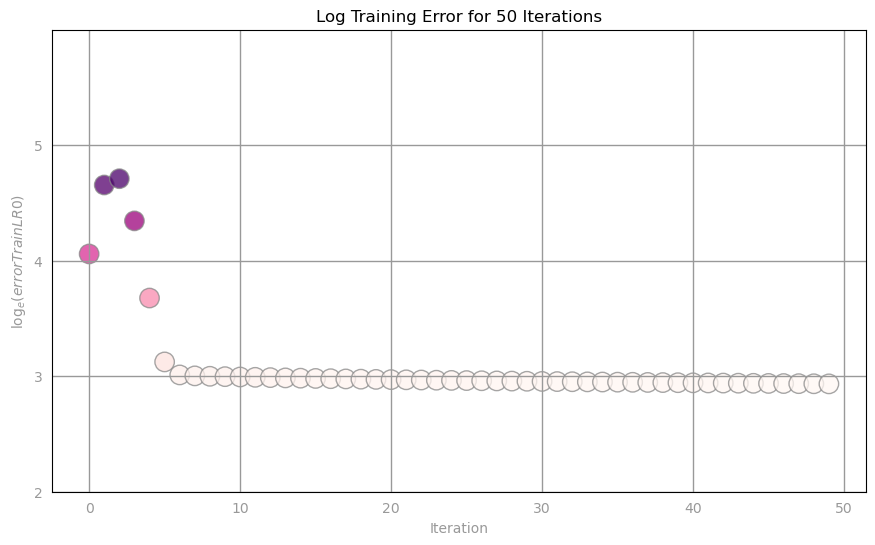

In [22]:
norm = Normalize()
clrs = cmap(np.asarray(norm(np.log(errorTrainLR0))))[:,0:5]

fig, ax = preparePlot(np.arange(0, 60, 10), np.arange(2, 6, 1))
ax.set_ylim(2, 6)
plt.scatter(range(0, numIters), np.log(errorTrainLR0), s=14**2, c=clrs, edgecolors='#888888', alpha=0.75)
ax.set_xlabel('Iteration'), ax.set_ylabel(r'$\log_e(errorTrainLR0)$')
plt.title("Log Training Error for 50 Iterations")
plt.show()

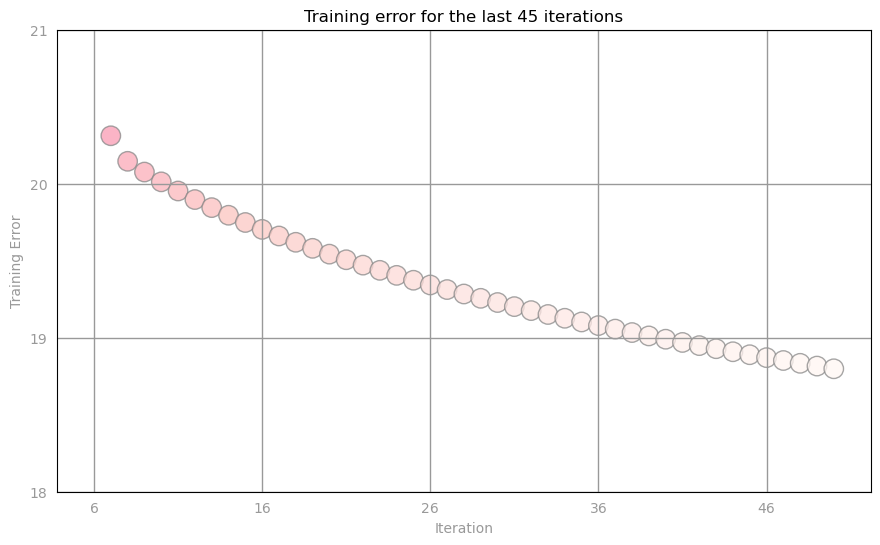

In [23]:
norm = Normalize()
clrs = cmap(np.asarray(norm(errorTrainLR0[5:])))[:,0:5]

fig, ax = preparePlot(np.arange(0, 60, 10), np.arange(17, 22, 1))
ax.set_ylim(18, 21)
plt.scatter(range(0, numIters-5), errorTrainLR0[5:], s=14**2, c=clrs, edgecolors='#888888', alpha=0.75)
ax.set_xticklabels(map(str, range(6, 66, 10)))
ax.set_xlabel('Iteration'), ax.set_ylabel(r'Training Error')
plt.title("Training error for the last 45 iterations")
plt.show()

### **Part 4: Train Least Squares Linear Regression with L2 regularization (via gradient descent) and evaluate a linear regression model**

#### **(4a) Gradient summand**
#### Recall that the gradient descent update for linear regression with L2 regularization is: $$ \scriptsize \mathbf{w}_{i+1} = \mathbf{w}_i - \alpha_i \left( \sum_j (\mathbf{w}_i^\top\mathbf{x}_j  - y_j) \mathbf{x}_j + \eta \mathbf{w}_i \right) \,.$$ where i is the iteration number of the gradient descent algorithm, and  j identifies the observation.
#### We have already implemented the function gradientSummand that computes the summand for this update, i.e., $$ (\mathbf{w}^\top \mathbf{x} - y) \mathbf{x} \,$$
#### We have also already implemented the `getLabeledPredictions` function that takes in weights and an observation's `LabeledPoint` and returns a (label, prediction) tuple.

#### **(4b) Gradient descent with L2 regularization**
#### Next, implement a gradient descent function for linear regression with L2 regularization and test out this function on an example.

In [24]:
# TODO: Replace <FILL IN> with appropriate code
def linregGradientDescentWithL2Regularization(trainData, numIters):
    """Calculates the weights and error for a linear regression model with L2 regularization trained with gradient descent.

    Note:
        `DenseVector` behaves similarly to a `numpy.ndarray` and they can be used interchangably
        within this function.  For example, they both implement the `dot` method.

    Args:
        trainData (RDD of LabeledPoint): The labeled data for use in training the model.
        numIters (int): The number of iterations of gradient descent to perform.

    Returns:
        (np.ndarray, np.ndarray): A tuple of (weights, training errors).  Weights will be the
            final weights (one weight per feature) for the model, and training errors will contain
            an error (RMSE) for each iteration of the algorithm.
    """
    # The length of the training data
    n = trainData.count()
    # The number of features in the training data
    d = len(trainData.take(1)[0].features)
    w = np.zeros(d)
    alpha = 1.0  # step
    eta = 1e-1  # regParam
    # We will compute and store the training error after each iteration
    errorTrain = np.zeros(numIters)
    for i in range(numIters):
        # Use getLabeledPrediction from (3b) with trainData to obtain an RDD of (label, prediction)
        # tuples.  Note that the weights all equal 0 for the first iteration, so the predictions will
        # have large errors to start.
        labelsAndPredsTrain = trainData.map(lambda lp :getLabeledPrediction(w,lp))
        errorTrain[i] = calcRMSE(labelsAndPredsTrain)

        # Calculate the `gradient`.  Make use of the `gradientSummand` function you wrote in (3a).
        # Be sure to properly account for the regularization term in the update.
        # Note that `gradient` sould be a `DenseVector` of length `d`.
        gradient = DenseVector(trainData.map(lambda lp :gradientSummand(w, lp)).sum())

        # Update the weights
        alpha_i = alpha / (n * np.sqrt(i+1))
        w -= alpha_i*(gradient + eta*w)
    return w, errorTrain

# create a toy dataset with n = 10, d = 5, and then run 10 iterations of gradient descent
# note: the resulting model will not be useful; the goal here is to verify that
# linregGradientDescent is working properly
exampleN = 10
exampleD = 5
exampleData = (sc
               .parallelize(parsedTrainData.take(exampleN))
               .map(lambda lp: LabeledPoint(lp.label, lp.features[0:exampleD])))
print (exampleData.take(1))
exampleNumIters = 10
exampleWeights, exampleErrorTrain = linregGradientDescentWithL2Regularization(exampleData, exampleNumIters)
print (exampleWeights)
print (exampleErrorTrain)

[LabeledPoint(83.0, [0.80089023,0.656657992,0.325012011,0.388967777,0.259227069])]


[36.05964226 26.12237945 16.63471303 17.1128036  13.08269256]
[63.89757429 28.86290998 20.10789627 20.07613424 20.05508977 20.03535301
 20.01708055 20.00015099 19.98437584 19.96958382]


#### **(4c) Train the model**
#### Now let's train a regularized linear regression model on all of our training data and evaluate its accuracy on the validation set.  Note that the test set will not be used here.  If we evaluated the model on the test set, we would bias our final results.
#### We've already done much of the required work: we computed the number of features in Part (1b); we created the training and validation datasets and computed their sizes in Part (1e); and, we wrote a function to compute RMSE in Part (2b).

In [25]:
# TODO: Replace <FILL IN> with appropriate code
numIters = 50
weightsRegularizedLRL2, errorTrainRegularizedLRL2 = linregGradientDescentWithL2Regularization(parsedTrainData,numIters)

labelsAndPreds = parsedValData.map(lambda lp: getLabeledPrediction(weightsRegularizedLRL2,lp))
rmseValRegularizedLRL2 = calcRMSE(labelsAndPreds)

print ('Validation RMSE:\n\tBaseline = {0:.3f}\n\tRegularizedLR = {1:.3f}'.format(rmseValBase,
                                                                       rmseValRegularizedLRL2))

Validation RMSE:
	Baseline = 21.448
	RegularizedLR = 18.788


#### **Visualization 5: Training error**
#### We will look at the log of the training error as a function of iteration. The first scatter plot visualizes the logarithm of the training error for all 50 iterations.  The second plot shows the training error itself, focusing on the final 45 iterations.

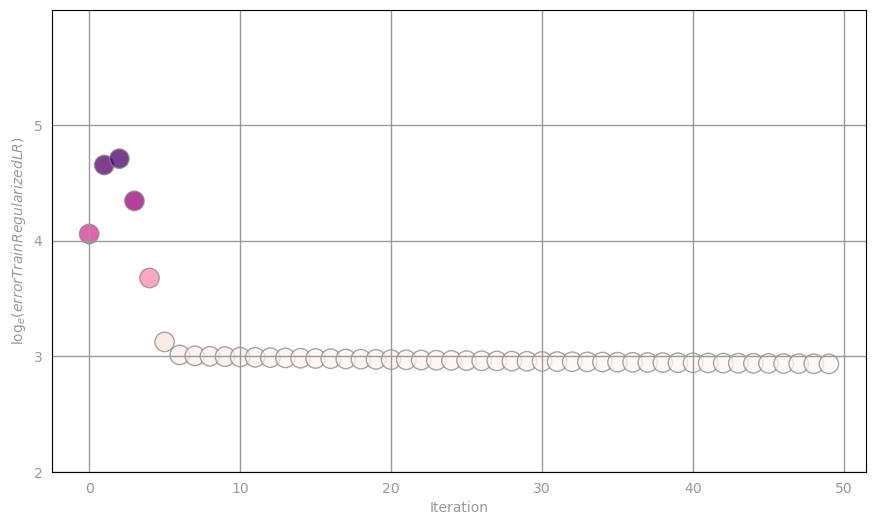

In [26]:
norm = Normalize()
clrs = cmap(np.asarray(norm(np.log(errorTrainRegularizedLRL2))))[:,0:5]

fig, ax = preparePlot(np.arange(0, 60, 10), np.arange(2, 6, 1))
ax.set_ylim(2, 6)
plt.scatter(range(0, numIters), np.log(errorTrainRegularizedLRL2), s=14**2, c=clrs, edgecolors='#888888', alpha=0.75)
ax.set_xlabel('Iteration'), ax.set_ylabel(r'$\log_e(errorTrainRegularizedLR)$')
plt.show()

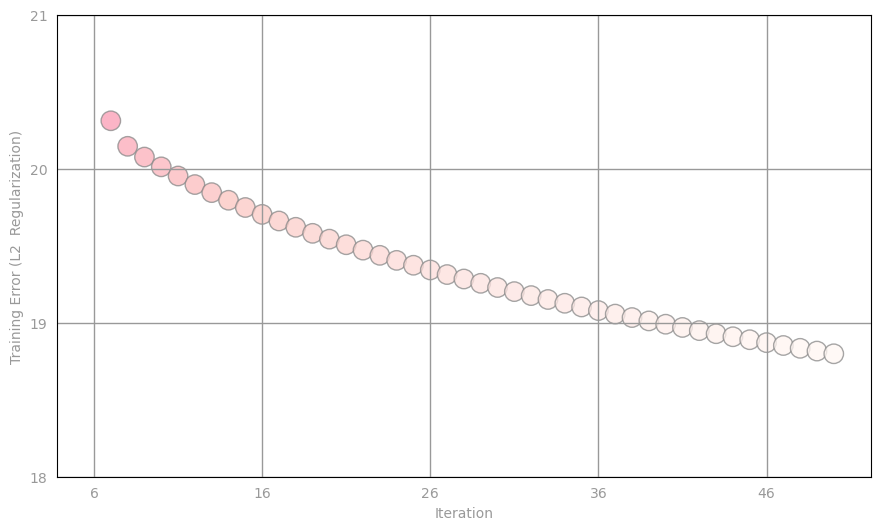

In [27]:
norm = Normalize()
clrs = cmap(np.asarray(norm(errorTrainRegularizedLRL2[5:])))[:,0:5]

fig, ax = preparePlot(np.arange(0, 60, 10), np.arange(17, 22, 1))
ax.set_ylim(18, 21)
plt.scatter(range(0, numIters-5), errorTrainRegularizedLRL2[5:], s=14**2, c=clrs, edgecolors='#888888', alpha=0.75)
ax.set_xticklabels(map(str, range(6, 66, 10)))
ax.set_xlabel('Iteration'), ax.set_ylabel(r'Training Error (L2  Regularization)')
plt.show()

#### **(4d) Lasso Regression**
####  Linear Regression with L1 regularization is also called Lasso Regression (Least Absolute Shrinkage and Selection Operator) . Lasso adds “absolute value of magnitude” of coefficient as penalty term to the loss function.  Different from linear regression with L2 regularization (which contains a close form solution), L1-regulairzation does not have a close form solution.

#### Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection. For more details, check a tutorial that describes different regularization methods: https://aunnnn.github.io/ml-tutorial/html/blog_content/linear_regression/linear_regression_regularized.html.

#### Gradient descent update for linear regression with L1 regularization is: $$ \scriptsize \mathbf{w}_{i+1} = \mathbf{w}_i - \alpha_i \left( \sum_j (\mathbf{w}_i^\top\mathbf{x}_j  - y_j) \mathbf{x}_j + \eta \text{sign}(\mathbf{w}_i )\right) \,.$$ where i is the iteration number of the gradient descent algorithm, and  j identifies the observation. The sign function returns -1 if w_i < 0, 0 if w_i==0, and 1 if w_i > 0.

#### We have already implemented the function gradientSummand that computes the summand for this update, i.e., $$ (\mathbf{w}^\top \mathbf{x} - y) \mathbf{x} \,$$
#### We have also already implemented the `getLabeledPredictions` function that takes in weights and an observation's `LabeledPoint` and returns a (label, prediction) tuple.


#### **(4e) Gradient Descent for L1**

#### Next, implement a gradient descent function for linear regression with L1 regularization and test out this function on an example.

In [28]:
# TODO: Replace <FILL IN> with appropriate code
def linregGradientDescentWithL1Regularization(trainData, numIters):
    """Calculates the weights and error for a linear regression model with L1 regularization trained with gradient descent.

    Note:
        `DenseVector` behaves similarly to a `numpy.ndarray` and they can be used interchangably
        within this function.  For example, they both implement the `dot` method.

    Args:
        trainData (RDD of LabeledPoint): The labeled data for use in training the model.
        numIters (int): The number of iterations of gradient descent to perform.

    Returns:
        (np.ndarray, np.ndarray): A tuple of (weights, training errors).  Weights will be the
            final weights (one weight per feature) for the model, and training errors will contain
            an error (RMSE) for each iteration of the algorithm.
    """
    # The length of the training data
    n = trainData.count()
    # The number of features in the training data
    d = len(trainData.take(1)[0].features)
    w = np.zeros(d)
    alpha = 1.0  # step
    eta = 1e-1  # regParam
    # We will compute and store the training error after each iteration
    errorTrain = np.zeros(numIters)
    for i in range(numIters):
        # Use getLabeledPrediction from (3b) with trainData to obtain an RDD of (label, prediction)
        # tuples.  Note that the weights all equal 0 for the first iteration, so the predictions will
        # have large errors to start.
        labelsAndPredsTrain = trainData.map(lambda lp :getLabeledPrediction(w,lp) )
        errorTrain[i] = calcRMSE(labelsAndPredsTrain)

        # Calculate the `gradient`.  Make use of the `gradientSummand` function you wrote in (3a).
        # Be sure to properly account for the regularization term in the update.
        # Note that `gradient` sould be a `DenseVector` of length `d`.
        gradient = DenseVector(trainData.map(lambda lp :gradientSummand(w, lp)).sum())

        # Update the weights
        alpha_i = alpha / (n * np.sqrt(i+1))
        w -= alpha_i*(gradient + eta*np.sign(w))
    return w, errorTrain

# create a toy dataset with n = 10, d = 5, and then run 10 iterations of gradient descent
# note: the resulting model will not be useful; the goal here is to verify that
# linregGradientDescent is working properly
exampleN = 10
exampleD = 5
exampleData = (sc
               .parallelize(parsedTrainData.take(exampleN))
               .map(lambda lp: LabeledPoint(lp.label, lp.features[0:exampleD])))
print (exampleData.take(1))
exampleNumIters = 10
exampleWeights, exampleErrorTrain = linregGradientDescentWithL1Regularization(exampleData, exampleNumIters)
print (exampleWeights)
print (exampleErrorTrain)

[LabeledPoint(83.0, [0.80089023,0.656657992,0.325012011,0.388967777,0.259227069])]


[36.37950572 26.30926812 16.69604997 17.2121429  13.14288486]
[63.89757429 28.86290998 20.12879655 20.07480084 20.04977608 20.02844516
 20.00914348 19.99135915 19.97479114 19.95922972]


#### **(4f) Train the model**
#### Now let's train a regularized linear regression model on all of our training data and evaluate its accuracy on the validation set.  Note that the test set will not be used here.  If we evaluated the model on the test set, we would bias our final results.
#### We've already done much of the required work: we computed the number of features in Part (1b); we created the training and validation datasets and computed their sizes in Part (1e); and, we wrote a function to compute RMSE in Part (2b).

In [29]:
# TODO: Replace <FILL IN> with appropriate code
numIters = 50
weightsRegularizedLRL1, errorTrainRegularizedLRL1 = linregGradientDescentWithL1Regularization(parsedTrainData,numIters)

labelsAndPreds = parsedValData.map(lambda lp: getLabeledPrediction(weightsRegularizedLRL1,lp))
rmseValRegularizedLRL1 = calcRMSE(labelsAndPreds)

print ('Validation RMSE:\n\tBaseline = {0:.3f}\n\tRegularizedLR with L1 = {1:.3f}'.format(rmseValBase,
                                                                       rmseValRegularizedLRL1))

Validation RMSE:
	Baseline = 21.448
	RegularizedLR with L1 = 18.788


### ** Part 5: Train using MLlib and perform grid search **

#### **(5a) `LinearRegressionWithSGD`**
#### We're already doing better than the baseline model, but let's see if we can do better by adding an intercept, using regularization (which we briefly explored earlier), and (based on the previous visualization) training for more iterations.  MLlib's [LinearRegressionWithSGD](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.mllib.regression.LinearRegressionWithSGD.html) essentially implements the same algorithm that we implemented in Part (3b), albeit more efficiently and with various additional functionality, such as stochastic gradient approximation, including an intercept in the model and also allowing L1 or L2 regularization.  First use LinearRegressionWithSGD to train a model with L2 regularization and with an intercept.  This method returns a [LinearRegressionModel](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.mllib.regression.LinearRegressionModel.html#pyspark.mllib.regression.LinearRegressionModel).  Next, use the model's [weights](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.mllib.regression.LinearModel.html#pyspark.mllib.regression.LinearModel.weights) and [intercept](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.mllib.regression.LinearModel.html#pyspark.mllib.regression.LinearModel.intercept) attributes to print out the model's parameters.

An overview of the LinearRegression's important Hyperparameters:

- intercept: bool, whether to fit an intercept term
- initialWeights: pyspark.mllib.linalg.Vector or convertible, optional, initial weights
- iterations: int, maximum iterations
- regParam: float, regularization terms
- regType: str, L1 or L2 regularizations
- step: float, step size

In [30]:
from pyspark.mllib.regression import LinearRegressionWithSGD
# Values to use when training the linear regression model
numIters = 500  # iterations
reg = 1e-1  # regParam
regType ="l2"
useIntercept = True  # intercept
initialWeights = weightsLR0
alpha = 1.0 #step

In [31]:
# TODO: use the above provided hyperparameters
# TODO: Replace <FILL IN> with appropriate code
firstModel = LinearRegressionWithSGD.train(data = parsedTrainData, iterations = numIters,
                                    step = alpha, initialWeights = weightsLR0,
                                    regParam = reg, regType = regType, intercept = useIntercept)

# weightsLR1 stores the model weights; interceptLR1 stores the model intercept
weightsLR1 = firstModel.weights
interceptLR1 = firstModel.intercept
print (weightsLR1, interceptLR1)

23/11/16 19:40:32 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
23/11/16 19:40:32 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


[17.168355815795323,15.539347489624445,-0.22780118364261165,6.608411394653751,4.417050582429208,-3.228673142207092,11.888496353073341,3.0195104536047026,7.650494123681182,4.695565066457354,8.50294887212516,2.8481049836081325] 11.099316137057212


#### **(5b) Predict**
#### Now use the [LinearRegressionModel.predict()](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.mllib.classification.LogisticRegressionModel.html#pyspark.mllib.classification.LogisticRegressionModel.predict) method to make a prediction on a sample point.  Pass the `features` from a `LabeledPoint` into the `predict()` method.

In [32]:
# TODO: Replace <FILL IN> with appropriate code
samplePoint = parsedTrainData.take(1)[0]
samplePrediction = firstModel.predict(samplePoint.features)
print (samplePrediction)

56.87100843346576


#### **(5c) Evaluate RMSE**
#### Next evaluate the accuracy of this model on the validation set.  Use the `predict()` method to create a `labelsAndPreds` RDD, and then use the `calcRMSE()` function from Part (2b).

In [33]:
# TODO: Replace <FILL IN> with appropriate code
labelsAndPreds = parsedValData.map(lambda lp:(lp.label,firstModel.predict(lp.features)))

rmseValLR1 = calcRMSE(labelsAndPreds)

print (('Validation RMSE:\n\tBaseline = {0:.3f}\n\tLR0 = {1:.3f}' +
       '\n\tLR1 = {2:.3f}').format(rmseValBase, rmseValLR0, rmseValLR1))

Validation RMSE:
	Baseline = 21.448
	LR0 = 18.788
	LR1 = 19.296


#### **(5d) Grid search**
#### We're already outperforming the baseline on the validation set by almost 2 years on average, but our current prediction gives a RMSE = 19 which is greater than our initital linear regression model.

#### Now let us perform a grid search to find a good regularization parameter.  Try `regParam` values `1e-6`, `1e-3`, and `1`.
#### Use LinearRegressionWithSGD to train the model, and use calcRMSE to calculate the predictions
#### Find the best model which mininizes the RMSE

In [34]:
# TODO: Replace <FILL IN> with appropriate code
bestRMSE = rmseValLR1
bestRegParam = reg
bestModel = firstModel

numIters = 500
alpha = 1.0
for reg in [1e-6, 1e-3, 1]:
    model = LinearRegressionWithSGD.train(data = parsedTrainData, iterations = numIters,
                                    step = alpha, initialWeights = weightsLR0,
                                    regParam = reg, regType = regType, intercept = useIntercept) #fit the model
    labelsAndPreds = parsedValData.map(lambda lp: (lp.label, model.predict(lp.features)))
    rmseValGrid = calcRMSE(labelsAndPreds)  #calculate RMSE
    if rmseValGrid < bestRMSE:
        bestRMSE = rmseValGrid
        bestRegParam = reg
        bestModel = model
#     <FILL IN> #select the bestRegParam, bestRMSE, bestModel

rmseValLRGrid = bestRMSE

print (('Validation RMSE:\n\tBaseline = {0:.3f}\n\tLR0 = {1:.3f}\n\tLR1 = {2:.3f}\n' +
       '\tLRGrid = {3:.3f}').format(rmseValBase, rmseValLR0, rmseValLR1, rmseValLRGrid))

print("Best Reg Param = {0:.10f}".format(bestRegParam))

Validation RMSE:
	Baseline = 21.448
	LR0 = 18.788
	LR1 = 19.296
	LRGrid = 17.048
Best Reg Param = 0.0000010000


#### **(5e) Vary alpha and the number of iterations**
#### In the previous grid search, we set `alpha = 1` for all experiments.  Now let's see what happens when we vary `alpha`.  Specifically, try `1e-3` and `10` as values for `alpha` and also try training models for 500 iterations (as before) but also for 100 and 5 iterations. Evaluate all models on the validation set.  Note that if we set `alpha` too small the gradient descent will require a huge number of steps to converge to the solution, and if we use too large of an `alpha` it can cause numerical problems, like you'll see below for `alpha = 10`.

In [35]:
# TODO: Replace <FILL IN> with appropriate code
reg = bestRegParam
modelRMSEs = []

for alpha in [1e-3,10]:
    for numIters in [500,100,5]:
        model = LinearRegressionWithSGD.train(data = parsedTrainData, iterations = numIters,
                                    step = alpha, initialWeights = weightsLR0,
                                    regParam = bestRegParam, regType = regType, intercept = useIntercept)
        labelsAndPreds = parsedValData.map(lambda lp: (lp.label, model.predict(lp.features)))
        rmseVal = calcRMSE(labelsAndPreds)
        print ('alpha = {0:.0e}, numIters = {1}, RMSE = {2:.3f}'.format(alpha, numIters, rmseVal))
        modelRMSEs.append(rmseVal)

alpha = 1e-03, numIters = 500, RMSE = 18.812
alpha = 1e-03, numIters = 100, RMSE = 18.812
alpha = 1e-03, numIters = 5, RMSE = 18.812
alpha = 1e+01, numIters = 500, RMSE = 249852484282342670114925514750607716906148708647158166640902022619935516933434155999812680815956266934323655284174618624.000


alpha = 1e+01, numIters = 100, RMSE = 789615186038131395912075839502552135683780839233256475450861395478839296.000
alpha = 1e+01, numIters = 5, RMSE = 6532686.900


#### **5(f): Hyperparameter heat map**
#### Next, we perform a visualization of hyperparameter search using a larger set of hyperparameters.

#### Specifically, we create a heat map where the brighter colors correspond to lower RMSE values.  The first plot has a large area with brighter colors.  In order to differentiate within the bright region, we generate a second plot corresponding to the hyperparameters found within that region.

alpha = 1e+00, numIters = 10, reg =1e-08, RMSE = 18.238


alpha = 1e+00, numIters = 10, reg =1e-06, RMSE = 18.238


alpha = 1e+00, numIters = 10, reg =1e-04, RMSE = 18.239
alpha = 1e+00, numIters = 10, reg =1e-02, RMSE = 18.325
alpha = 1e+00, numIters = 10, reg =1e-01, RMSE = 19.075


alpha = 1e+00, numIters = 10, reg =1e+00, RMSE = 73.469


alpha = 1e+00, numIters = 50, reg =1e-08, RMSE = 17.637


alpha = 1e+00, numIters = 50, reg =1e-06, RMSE = 17.637


alpha = 1e+00, numIters = 50, reg =1e-04, RMSE = 17.639


alpha = 1e+00, numIters = 50, reg =1e-02, RMSE = 17.830


alpha = 1e+00, numIters = 50, reg =1e-01, RMSE = 19.259


alpha = 1e+00, numIters = 50, reg =1e+00, RMSE = 23.534


alpha = 1e+00, numIters = 100, reg =1e-08, RMSE = 17.315


alpha = 1e+00, numIters = 100, reg =1e-06, RMSE = 17.315


alpha = 1e+00, numIters = 100, reg =1e-04, RMSE = 17.317


alpha = 1e+00, numIters = 100, reg =1e-02, RMSE = 17.568


alpha = 1e+00, numIters = 100, reg =1e-01, RMSE = 19.296


alpha = 1e+00, numIters = 100, reg =1e+00, RMSE = 23.534


alpha = 1e+00, numIters = 250, reg =1e-08, RMSE = 17.048


alpha = 1e+00, numIters = 250, reg =1e-06, RMSE = 17.048


alpha = 1e+00, numIters = 250, reg =1e-04, RMSE = 17.054


alpha = 1e+00, numIters = 250, reg =1e-02, RMSE = 17.449


alpha = 1e+00, numIters = 250, reg =1e-01, RMSE = 19.296


alpha = 1e+00, numIters = 250, reg =1e+00, RMSE = 23.534


alpha = 1e+00, numIters = 500, reg =1e-08, RMSE = 17.048


alpha = 1e+00, numIters = 500, reg =1e-06, RMSE = 17.048


alpha = 1e+00, numIters = 500, reg =1e-04, RMSE = 17.054


alpha = 1e+00, numIters = 500, reg =1e-02, RMSE = 17.449


alpha = 1e+00, numIters = 500, reg =1e-01, RMSE = 19.296


alpha = 1e+00, numIters = 500, reg =1e+00, RMSE = 23.534


alpha = 1e+00, numIters = 1000, reg =1e-08, RMSE = 17.048
alpha = 1e+00, numIters = 1000, reg =1e-06, RMSE = 17.048


alpha = 1e+00, numIters = 1000, reg =1e-04, RMSE = 17.054


alpha = 1e+00, numIters = 1000, reg =1e-02, RMSE = 17.449
alpha = 1e+00, numIters = 1000, reg =1e-01, RMSE = 19.296


alpha = 1e+00, numIters = 1000, reg =1e+00, RMSE = 23.534


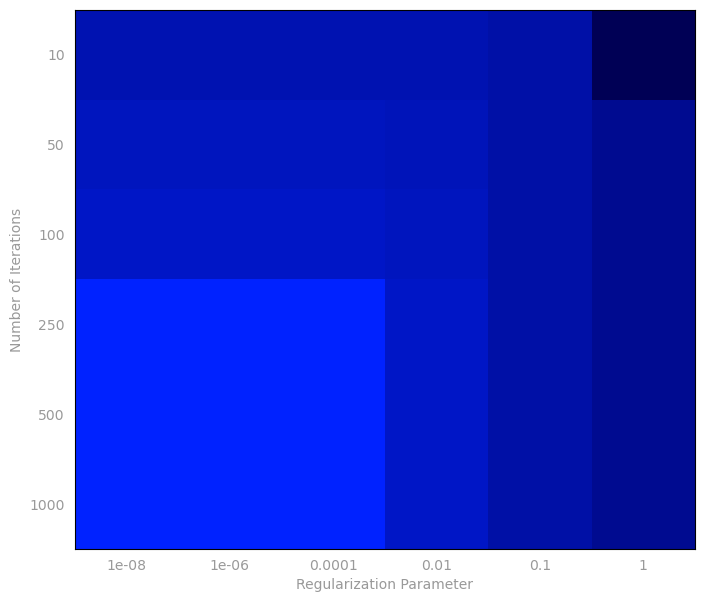

In [36]:
from matplotlib.colors import LinearSegmentedColormap

# Saved parameters and results, to save the time required to run 36 models
# TODO: replace all <FILL IN> with your code
modelRMSEs = []

numItersParams = [10, 50, 100, 250, 500, 1000]
regParams = [1e-8, 1e-6, 1e-4, 1e-2, 1e-1, 1]
alpha = 1.0
for numIters in numItersParams:
    for reg in regParams:
        model = LinearRegressionWithSGD.train(data = parsedTrainData, iterations = numIters,
                                    step = alpha, initialWeights = weightsLR0,
                                    regParam = reg, regType = regType, intercept = useIntercept)
        labelsAndPreds = parsedValData.map(lambda lp: (lp.label, model.predict(lp.features)))
        rmseVal = calcRMSE(labelsAndPreds)
        print ('alpha = {0:.0e}, numIters = {1}, reg ={2:.0e}, RMSE = {3:.3f}'.format(alpha, numIters, reg, rmseVal))
        modelRMSEs.append(rmseVal)

numRows, numCols = len(numItersParams), len(regParams)
rmseVal = np.array(modelRMSEs)
rmseVal = rmseVal.reshape((numRows, numCols))

fig, ax = preparePlot(np.arange(0, numCols, 1), np.arange(0, numRows, 1), figsize=(8, 7), hideLabels=True,
                      gridWidth=0.)
ax.set_xticklabels(regParams), ax.set_yticklabels(numItersParams)
ax.set_xlabel('Regularization Parameter'), ax.set_ylabel('Number of Iterations')

colors = LinearSegmentedColormap.from_list('blue', ['#0022ff', '#000055'], gamma=.2)
image = plt.imshow(rmseVal,interpolation='nearest', aspect='auto',
                    cmap = colors)
plt.show()

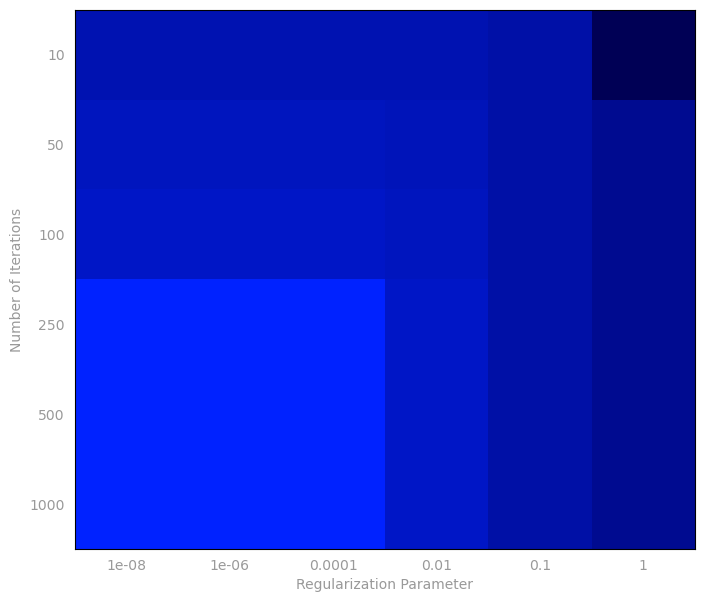

In [41]:
numRows, numCols = len(numItersParams), len(regParams)
rmseVal = np.array(modelRMSEs)
rmseVal = rmseVal.reshape((numRows, numCols))

fig, ax = preparePlot(np.arange(0, numCols, 1), np.arange(0, numRows, 1), figsize=(8, 7), hideLabels=True,
                      gridWidth=0.)
ax.set_xticklabels(regParams), ax.set_yticklabels(numItersParams)
ax.set_xlabel('Regularization Parameter'), ax.set_ylabel('Number of Iterations')

colors = LinearSegmentedColormap.from_list('blue', ['#0022ff', '#000055'], gamma=.2)
image = plt.imshow(rmseVal,interpolation='nearest', aspect='auto',
                    cmap = colors)
plt.show()

#### **5(g): According to the Heatmap, which hyperparameter configurations give the best model?**

<span style="color: red;">Number of iterations = 250, regularization parameter = 1e-06. There are multiple models that have the same RMSE but this one takes the least number of epochs and highest regularization coefficient so its likely to be more generalizable</span>

### **Part 6: Linear Regression in Distributed Systems**

#### In the class, we have seen various ways to reduce computational cost. If we have large numbers of machines, we can perform a distributed computation of regression gradient descent on each machine, and then combine the results later. The distributed way of computation can bring many huge advantages: (1) time efficiency (2) protecting user privacy (data only needs to be stored locally).

#### However, calculation across distributed systems can bring various problems. In this homework, we will investigate different ways of distributed computing.

#### If you are interested, please check distributed learning and [federated learning](https://federated.withgoogle.com/)

#### 6(a) Divide and Conquer Approach

#### First, parsedTrainData should be paritioned into 10 pieces already. Simulating that each local machine sees 1/10 of the training data.

In [37]:
parsedTrainData.getNumPartitions()

10

#### Run the Linear Regression we have just used, with numIters = 60.

In [38]:
#TODO: Fill in <FILL IN>
numIters = 60
weightsLR0, errorTrainLR0 = linregGradientDescent(parsedTrainData,numIters)

labelsAndPreds = parsedValData.map(lambda lp: getLabeledPrediction(weightsLR0,lp))
rmseValLR0 = calcRMSE(labelsAndPreds)

print ('Validation RMSE:\n\tBaseline = {0:.3f}\n\tLinear Regression = {1:.3f}'.format(rmseValBase,
                                                                       rmseValLR0))

Validation RMSE:
	Baseline = 21.448
	Linear Regression = 18.629


#### 6(b). Next, we build the divide-and-conquer. Assume that we need to set numIter = 60 for a single machine. Now we have 10 local machines.

#### We can instead run a smaller number of iterations. Each client will be running a local gradient descent for some iterations. And then return the weight. Then, all weights are aggregated and an average is taken to acquire the final weights. Implement the divide-and-conquer approach in the following codes:

In [39]:
## TODO: Complete the <FILL IN>
def localGradientDescent(partitionData,numIters, d, alpha):
    """
    Performs local gradient descent on a partition of data to optimize the weights of a model.
    The gradient descent is performed for a specified number of iterations, updating the weights using the
    gradient summand of each data point in the partition and a decaying learning rate.

    Input:
        partitionData: An iterator over the partition's data points. Each data point is expected to be a tuple
                       or an object that the gradientSummand function can process.
        numIters: The number of iterations to run the gradient descent algorithm.
        d: The dimensionality of the feature space (i.e., the number of features).
        alpha: The initial step size (learning rate) for the gradient descent updates.

    Output:
        A list containing the single element of the final weight vector (numpy array) after gradient descent optimization.

    Note:
        - The partitionData is first converted to a list to enable multiple passes for each iteration of gradient descent.
        - The learning rate decays with the iteration number to ensure convergence.
        - The function gradientSummand should be defined elsewhere and should return the gradient of the loss function
          with respect to the weights for a single data point.
    """
    partitionData = list(partitionData)
    n = len(partitionData)
    wLocal = np.zeros(d)
    for i in range(numIters):
        gradientLocal = np.sum([gradientSummand(wLocal, lp) for lp in partitionData],axis=0)
        alpha_i = alpha / (n * np.sqrt(i+1))
        wLocal -= alpha_i * (gradientLocal)
    return [wLocal]



n = parsedTrainData.count()
d = len(parsedTrainData.take(1)[0].features)
alpha = 1 #steps
totalNumIters = 60
numIters = int(totalNumIters) # <FILL IN> #remember to cast it as integer value!

# Perform local gradient descent on each partition
localWeights = parsedTrainData.mapPartitions(lambda part: localGradientDescent(part, numIters,d , alpha))
# Average the weights from each partition
finalWeights = localWeights.mean()

labelsAndPreds = parsedValData.map(lambda lp:  getLabeledPrediction(finalWeights, lp))
rmseValDC = calcRMSE(labelsAndPreds)

print ('Validation RMSE:\n\tBaseline = {0:.3f}\n\tDivideAndConquer = {1:.3f}'.format(rmseValBase,
                                                                       rmseValDC))

Validation RMSE:
	Baseline = 21.448
	DivideAndConquer = 18.629


#### 6(c): According to the Validation RMSE, what have you observed?

<span style="color: red;">The performance is worse than the previous method cause here we carry out all the iterations on the samller dataset and then average out the weights thus not getting the best set of weights that give use more accurate solutions. Although as expected it is better than the baseline cause we are atleast learning something from the data instead of just using the average value.</span>

#### 6(d) Iterative Updating Approach - Mini batching

#### Now let's consider the mini batch approach as discussed in the class.
#### Each client will (1) take a batch of data from the partition. (2) Perform gradient descent on this mini-batch. (3) Return the weight updates from this mini-batch. For communication, an update step will take sets of weight updates (from different partitions) and combine them, typically by averaging. Iterate over this process a certain number of times , each time applying the local gradient descent function to each partition and then combining the results across all partitions with the reduce function. After each iteration, update your global weights w with the results of the reduce operation.

#### In the minibatch below, assume that you have numCommunications =3. That is, the clients will communicate three times. The globalWeight update will take place 3 times.

#### We fix total number of iterations = 60. The same as minibatch.

In [40]:
## TODO: Complete <FILL IN>
def localGradientDescent(wLocal,prevIters, partitionData,numIters, d, alpha):
    """
    Performs local gradient descent on a partition of data to optimize the weights of a model.
    The gradient descent is performed for a specified number of iterations, updating the weights using the
    gradient summand of each data point in the partition and a decaying learning rate.

    Input:
        wLocal: an numpy array that could be updated during gradient descent
        prevIters: previous iteration (used for learning rate scheduler)
        partitionData: An iterator over the partition's data points. Each data point is expected to be a tuple
                       or an object that the gradientSummand function can process.
        numIters: The number of iterations to run the gradient descent algorithm.
        d: The dimensionality of the feature space (i.e., the number of features).
        alpha: The initial step size (learning rate) for the gradient descent updates.

    Output:
        A list containing the single element of the final weight vector (numpy array) after gradient descent optimization.

    Note:
        - The partitionData is first converted to a list to enable multiple passes for each iteration of gradient descent.
        - The learning rate decays with the iteration number to ensure convergence.
        - The function gradientSummand should be defined elsewhere and should return the gradient of the loss function
          with respect to the weights for a single data point.
    """
    partitionData = list(partitionData)
    n = len(partitionData)
    retLocal = wLocal.copy() #create a copy from the wLocal
    for i in range(numIters):
        gradientLocal = np.sum([gradientSummand(retLocal, lp) for lp in partitionData],axis=0)
        alpha_i = alpha / (n * np.sqrt((i+prevIters)+1)) #the prevIters is used here for learning rate scheduler
        retLocal -= alpha_i * (gradientLocal)
    return [retLocal]



n = parsedTrainData.count()
d = len(parsedTrainData.take(1)[0].features)
alpha = 1 #steps
totalNumIters = 60
numCommunications = 3 #number of times of client communications
numIters = int(totalNumIters/numCommunications) #in total we want 60 iterations. Now we know there are 3 number of communications
#betweeen clients. Calculate how many times a local gradient descent is performed until a communication occurs.
wLocal = np.zeros(d)
prevIters = 0

for i in range(numCommunications):
    localWeights = parsedTrainData.mapPartitions(lambda partitionData: localGradientDescent(wLocal,prevIters, partitionData,numIters, d, alpha)) #remember to pass in the prevIters, see localGradientDescent documentation above!
    globalWeights = localWeights.mean()
    wLocal = globalWeights
    prevIters += (i+1)*numIters

labelsAndPreds = parsedValData.map(lambda lp:  getLabeledPrediction(wLocal, lp))
rmseValMB = calcRMSE(labelsAndPreds)


print ('Validation RMSE:\n\tBaseline = {0:.3f}\n\t Minibatch = {1:.3f}'.format(rmseValBase,
                                                                       rmseValMB))

Validation RMSE:
	Baseline = 21.448
	 Minibatch = 18.680


#### 6(e): Compare LinearRegression, Minibatch Linear Regression and Divide and Conquer Linear Regression. What do you discover? In what scenario will Minibatch Linear Regression's performance be comparable to the LinearRegression results? What do you see as advantages and disadvantages of Minibatch?

<span style="color: red;"> Based on the RMSE Values we can conclude that LinearRegression > Minibatch Linear Regression > Divide and Conquer Linear Regression. I think it is because the way we deal with the weights. In the first method after every step we get all the gradients from the update and then calculate the new weights which makes it relatively easier to reach the global minima. On the other hand with Divide And Conquer we do all the computations on local machine and average out the weights as a result of which we do not reach the local minima because our weights are average of the weights from local machine after some n number of iterations. Mini Batch plays an intermediate between the two methods and can be comparable to LinearRegression when the number of communications will be closer to the number of communications of the LinearRegression Method. The advantage of MiniBatch Linear Regression is that the number of communications is less tha n the number of communications with the LinearRegression method there by saving the time required to communicate over the network. Although a disadvantage is that since we do not send the weights to the after every step by the time we receive the weights they might not be a good representation of the entire dataset but rather are only the represetntation of the smaller dataset on the local machine.</span>

## END